In [17]:
from lrgsglib.core import *
move_to_rootf()

Current working directory: /home/opisthofulax/PhD/projects/complex-networks/lrgsglib


In [18]:
side = 64
p = 0.3
geo='hex'

In [20]:
l = Lattice2D(side, 
                pflip=p, 
                geo=geo, 
                init_nw_dict=True)
l.flip_sel_edges(l.nwDict['randXERR']['G'])
#
l.compute_k_eigvV()
#
import time

# Timing smax computation
start_time_smax = time.time()

eigV = l.eigV[0]
negative_count = np.sum(eigV < 0)
positive_count = np.sum(eigV > 0)
# Determine majority sign
minority_sign = -1 if negative_count > positive_count else 1
# Find positions of elements with majority sign
if minority_sign == -1:
    min_pos = np.where(eigV < 0)[0]  # Get positions of negative values
else:
    min_pos = np.where(eigV > 0)[0]  # Get positions of positive values

# Extract subgraph with nodes at min_pos
subG = l.G.subgraph(min_pos)
# Find the connected components of the subgraph
clust = np.array([len(component) for component in nx.connected_components(subG)])
srtclust=sorted(clust)
if len(clust) > 1:
    smax = np.max(clust) / (1.0 * l.N)
    var = ((np.sum(np.multiply(clust,clust))- np.max(clust)*np.max(clust))/(np.sum(clust) - np.max(clust)))
else:
    smax = 1.0*len(clust)
    var = 0.0

# End timer and print elapsed time for smax
end_time_smax = time.time()
elapsed_time_smax = end_time_smax - start_time_smax
print(f"smax: {smax}, Time for computing smax: {elapsed_time_smax:.4f} seconds")

# Timing smax2 computation
start_time_smax2 = time.time()

# Computation for smax2
l.load_eigV_on_graph(binarize=True)
l.make_clustersYN("eigV0", +1)
smax2 = len(l.clustersY[0]) / l.N

# End timer and print elapsed time for smax2
end_time_smax2 = time.time()
elapsed_time_smax2 = end_time_smax2 - start_time_smax2
print(f"smax2: {smax2}, Time for computing smax2: {elapsed_time_smax2:.4f} seconds")


smax: 0.5360243055555556, Time for computing smax: 0.0437 seconds
smax2: 0.5360243055555556, Time for computing smax2: 0.0167 seconds


In [ ]:
sizes = [32]
for side in sizes:
    fread = pth_join("data/test_hexerr", f"full.txt")
    data = np.loadtxt(fread, delimiter=',') 
    data = data[np.argsort(data[:, 0])]
    plt.plot(data[:, 9], gaussian_filter1d(data[:, 1], sigma=1), label=fr'${side}$', lw=3)
plt.axvline(0.25)

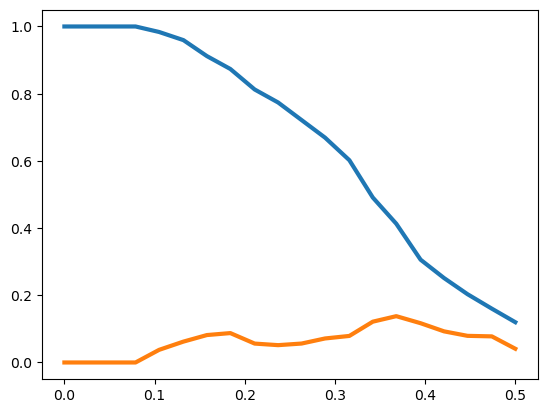

In [32]:
sizes = [32]
for side in sizes:
    l = Lattice2D(side, geo='hex', dataOut="data/test_hexerr")
    fread = pth_join(l.phtrapath, f"full.txt")
    data = np.loadtxt(fread)
    data = data[np.argsort(data[:, 1])]
    plt.plot(data[:, 1], data[:, 4], label=fr'${side}$', lw=3)
    plt.plot(data[:, 1], data[:, 5], label=fr'${side}$', lw=3)
# plt.xlim(0, .3)
# plt.yscale('log')
# plt.axvline(0.25)

In [24]:
l.load_eigV_on_graph(binarize=True)

In [ ]:
l.phtrapath

In [5]:
a = np.loadtxt("/home/opisthofulax/PhD/projects/complex-networks/lrgsglib/data/test_hexerr/full_xerr.txt", delimiter=",")

In [ ]:
plt.plot(a[:,9], a[:,1], 'o')   

In [17]:
a = np.loadtxt("/home/opisthofulax/PhD/projects/complex-networks/lrgsglib/data/test_hexerr/l2d_hexagonal/phtra/L1=32_L2=18/full.txt")

In [ ]:
plt.plot(a[:,1], a[:,5], 'o')   

In [20]:
a = np.loadtxt("/home/opisthofulax/PhD/projects/complex-networks/lrgsglib/data/test_hexerr/l2d_squared/phtra/N=1024/full.txt")

In [ ]:
plt.plot(a[:,1], a[:,5], 'o')   